In [37]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, f1_score, roc_auc_score
from itertools import combinations
from sklearn import metrics, preprocessing, svm
plt.rc("font", size=14)
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Retrieve data
model_df = pd.read_csv('model.csv')
# View data types and first rows of data frame
model_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
0,10.69,86.10,8920.16,19912.85,30.42,31.72,1.18,145.41,2.236,1.786,...,0.01,0.01,0.01,0.13,0.00,0.00,0.00,0.00,0.00,0
1,28.50,65.19,6564.00,6716.67,32.50,23.40,2.74,91.11,1.000,1.000,...,0.06,0.01,0.00,0.09,285.80,0.00,16.44,1.98,42.26,0
2,24.87,73.79,4285.47,6463.75,40.50,51.53,2.84,93.90,2.400,1.400,...,0.08,0.02,0.02,0.44,494.62,135.41,127.45,46.00,14.92,0
3,13.64,85.82,6887.56,9244.44,49.56,53.44,0.36,171.45,1.875,2.167,...,0.03,0.01,0.00,0.05,1015.19,0.00,210.63,92.58,0.00,0
4,4.50,95.92,8746.50,19987.50,32.75,37.88,0.92,153.25,2.000,1.500,...,0.01,0.00,0.00,0.04,0.00,106.41,79.00,0.00,0.00,0


In [3]:
model_df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
count,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,...,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000
mean,12.134211,83.838361,7319.620881,13449.501569,33.507640,36.983300,1.518232,124.108845,1.697824,1.407075,...,0.074435,0.008550,0.013537,0.133531,290.756534,357.976444,103.482568,28.847016,38.509910,0.042553
std,6.587858,8.672843,2652.539364,8197.452662,11.906865,14.209314,1.007398,33.130292,0.776810,0.652138,...,0.138356,0.020052,0.029078,0.156658,471.958770,597.594147,136.248095,62.759062,90.882963,0.201849
min,0.000000,20.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.010000,-0.020000,-0.020000,0.000000,-751.260000,-405.370000,-616.230000,-490.160000,-719.720000,0.000000
25%,7.670000,79.000000,5618.627500,8700.000000,26.880000,28.780000,0.820000,103.027500,1.272000,1.000000,...,0.010000,0.000000,0.000000,0.060000,0.000000,0.000000,14.970000,0.000000,0.000000,0.000000
50%,12.020000,84.360000,7285.590000,11862.650000,32.770000,35.940000,1.420000,127.240000,1.667000,1.399000,...,0.030000,0.000000,0.010000,0.090000,115.140000,102.265000,59.350000,10.500000,0.000000,0.000000
75%,16.080000,89.670000,8780.870000,15896.575000,39.100000,43.830000,2.020000,143.100000,2.064000,1.714000,...,0.080000,0.010000,0.010000,0.140000,380.142500,485.880000,140.952500,34.860000,49.862500,0.000000
max,62.710000,100.000000,26333.500000,170300.000000,146.000000,146.000000,18.670000,524.000000,44.000000,44.000000,...,5.300000,0.700000,1.690000,4.080000,15288.660000,19503.760000,3265.980000,6561.930000,13487.000000,1.000000


In [4]:
# Retrieve data
val_df = pd.read_csv('val.csv')
# View data types and first rows of data frame
val_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
0,22.88,75.59,3367.08,6131.31,41.38,43.08,2.13,102.67,0.500,0.500,...,0.08,0.00,0.05,0.17,0.00,1035.14,158.71,13.28,0.00,1
1,15.94,86.26,5595.00,10867.86,52.29,61.21,3.05,124.94,3.200,2.400,...,0.01,0.00,0.00,0.06,438.50,0.00,72.78,44.88,25.39,1
2,25.16,64.20,4758.44,7818.15,46.28,50.72,2.69,110.16,1.124,0.889,...,0.08,0.02,0.02,0.10,622.70,755.52,102.89,6.24,0.00,1
3,19.50,77.81,5762.27,6290.00,58.14,76.27,2.44,119.92,1.222,1.000,...,0.04,0.00,0.01,0.08,197.55,396.27,76.34,8.44,2.00,1
4,11.11,85.09,11400.50,20936.25,30.00,29.75,0.50,125.89,2.167,1.333,...,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,1


In [5]:
model_df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30',
       'default'],
      dtype='object')

In [6]:
#features and variables of model.csv
features = model_df.drop(['default'], axis = 1)
#normalization of features 
features=(features-np.min(features))/(np.max(features)-np.min(features)).values
features

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30
0,0.170467,0.824606,0.338738,0.116928,0.208356,0.217260,0.063203,0.277500,0.050818,0.040591,...,0.004734,0.003766,0.041667,0.017544,0.031863,0.046837,0.020361,0.158732,0.069506,0.050661
1,0.454473,0.560757,0.249264,0.039440,0.222603,0.160274,0.146760,0.173874,0.022727,0.022727,...,0.017885,0.013183,0.041667,0.011696,0.022059,0.064655,0.020361,0.162966,0.069786,0.053635
2,0.396587,0.669274,0.162738,0.037955,0.277397,0.352945,0.152116,0.179198,0.054545,0.031818,...,0.015781,0.016949,0.055556,0.023392,0.107843,0.077674,0.027162,0.191561,0.076029,0.051711
3,0.217509,0.821073,0.261551,0.054283,0.339452,0.366027,0.019282,0.327195,0.042614,0.049250,...,0.014729,0.007533,0.041667,0.011696,0.012255,0.110128,0.020361,0.212987,0.082634,0.050661
4,0.071759,0.948517,0.332143,0.117366,0.224315,0.259452,0.049277,0.292462,0.045455,0.034091,...,0.011047,0.003766,0.027778,0.011696,0.009804,0.046837,0.025706,0.179081,0.069506,0.050661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93995,0.130442,0.905994,0.163491,0.031826,0.209589,0.235822,0.039100,0.146317,0.000000,0.000000,...,0.014203,0.039548,0.083333,0.035088,0.009804,0.046837,0.020361,0.158732,0.069506,0.050661
93996,0.210812,0.799874,0.289163,0.084913,0.224247,0.238014,0.099089,0.223702,0.051977,0.042091,...,0.011047,0.015066,0.041667,0.017544,0.068627,0.060675,0.020361,0.161290,0.071756,0.055147
93997,0.237761,0.815268,0.175773,0.035643,0.214384,0.270068,0.111944,0.258969,0.068182,0.045455,...,0.050500,0.084746,0.111111,0.035088,0.056373,0.076065,0.033714,0.170295,0.071315,0.054348
93998,0.171743,0.822587,0.324318,0.114227,0.204932,0.210753,0.066417,0.281279,0.045750,0.031636,...,0.078906,0.026365,0.041667,0.023392,0.024510,0.052068,0.072315,0.231178,0.077035,0.050661


In [7]:
label = model_df[['default']]
label.head()

,default
0,0
1,0
2,0
3,0
4,0


In [8]:
#features and label for val.csv
features_val = val_df.drop(['default'], axis = 1)
#normalization of features_val
features_val=(features_val-np.min(features))/(np.max(features)-np.min(features)).values
features_val

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30
0,22.88,75.59,3367.08,6131.31,41.38,43.08,2.13,102.67,0.500,0.500,...,28.0,0.08,0.00,0.05,0.17,0.00,1035.14,158.71,13.28,0.00
1,15.94,86.26,5595.00,10867.86,52.29,61.21,3.05,124.94,3.200,2.400,...,64.0,0.01,0.00,0.00,0.06,438.50,0.00,72.78,44.88,25.39
2,25.16,64.20,4758.44,7818.15,46.28,50.72,2.69,110.16,1.124,0.889,...,55.0,0.08,0.02,0.02,0.10,622.70,755.52,102.89,6.24,0.00
3,19.50,77.81,5762.27,6290.00,58.14,76.27,2.44,119.92,1.222,1.000,...,283.0,0.04,0.00,0.01,0.08,197.55,396.27,76.34,8.44,2.00
4,11.11,85.09,11400.50,20936.25,30.00,29.75,0.50,125.89,2.167,1.333,...,26.0,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,14.55,88.05,8492.47,28646.00,46.15,49.21,0.40,90.21,1.615,1.231,...,15.0,0.00,0.00,0.00,0.04,0.88,72.39,18.19,10.84,0.00
11496,17.64,79.79,6303.06,8729.09,49.82,50.06,2.13,107.69,1.667,1.500,...,64.0,0.11,0.01,0.01,0.13,269.84,449.14,2.18,22.84,21.80
11497,28.31,74.50,5713.82,10946.15,38.15,33.27,3.29,102.87,1.250,1.000,...,27.0,0.03,0.00,0.00,0.10,0.00,201.04,12.08,6.98,0.00
11498,16.54,77.79,3028.71,4775.00,27.38,39.43,3.47,75.11,0.800,0.800,...,7.0,0.00,0.00,0.00,0.06,237.75,0.00,10.56,7.62,9.38


In [9]:
label_val = val_df[['default']]
label_val.head()

,default
0,1
1,1
2,1
3,1
4,1


In [10]:
#checking for null values
# features.isnull().sum()
#No null values found

In [11]:
#remove duplicate rows
features.duplicated().sum()

1

In [12]:
features.drop_duplicates(keep = False)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30
0,0.170467,0.824606,0.338738,0.116928,0.208356,0.217260,0.063203,0.277500,0.050818,0.040591,...,0.004734,0.003766,0.041667,0.017544,0.031863,0.046837,0.020361,0.158732,0.069506,0.050661
1,0.454473,0.560757,0.249264,0.039440,0.222603,0.160274,0.146760,0.173874,0.022727,0.022727,...,0.017885,0.013183,0.041667,0.011696,0.022059,0.064655,0.020361,0.162966,0.069786,0.053635
2,0.396587,0.669274,0.162738,0.037955,0.277397,0.352945,0.152116,0.179198,0.054545,0.031818,...,0.015781,0.016949,0.055556,0.023392,0.107843,0.077674,0.027162,0.191561,0.076029,0.051711
3,0.217509,0.821073,0.261551,0.054283,0.339452,0.366027,0.019282,0.327195,0.042614,0.049250,...,0.014729,0.007533,0.041667,0.011696,0.012255,0.110128,0.020361,0.212987,0.082634,0.050661
4,0.071759,0.948517,0.332143,0.117366,0.224315,0.259452,0.049277,0.292462,0.045455,0.034091,...,0.011047,0.003766,0.027778,0.011696,0.009804,0.046837,0.025706,0.179081,0.069506,0.050661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93995,0.130442,0.905994,0.163491,0.031826,0.209589,0.235822,0.039100,0.146317,0.000000,0.000000,...,0.014203,0.039548,0.083333,0.035088,0.009804,0.046837,0.020361,0.158732,0.069506,0.050661
93996,0.210812,0.799874,0.289163,0.084913,0.224247,0.238014,0.099089,0.223702,0.051977,0.042091,...,0.011047,0.015066,0.041667,0.017544,0.068627,0.060675,0.020361,0.161290,0.071756,0.055147
93997,0.237761,0.815268,0.175773,0.035643,0.214384,0.270068,0.111944,0.258969,0.068182,0.045455,...,0.050500,0.084746,0.111111,0.035088,0.056373,0.076065,0.033714,0.170295,0.071315,0.054348
93998,0.171743,0.822587,0.324318,0.114227,0.204932,0.210753,0.066417,0.281279,0.045750,0.031636,...,0.078906,0.026365,0.041667,0.023392,0.024510,0.052068,0.072315,0.231178,0.077035,0.050661


In [13]:
#check default and non default seperation
model_df['default'].value_counts()

0    90000
1     4000
Name: default, dtype: int64

In [14]:
#EDA for features_val
print(features_val.duplicated().sum())

0


#### Feature selection with correlation

In [15]:
#Correlation between the features wrt default to find the features that are closely correlated
cor = model_df.corr()
cor[['default']]

,default
A1,0.224554
A2,-0.214566
A3,-0.173111
A4,-0.123059
A5,0.180650
A6,0.178333
A7,0.166574
A8,-0.150192
A9,-0.132580
A10,-0.125432


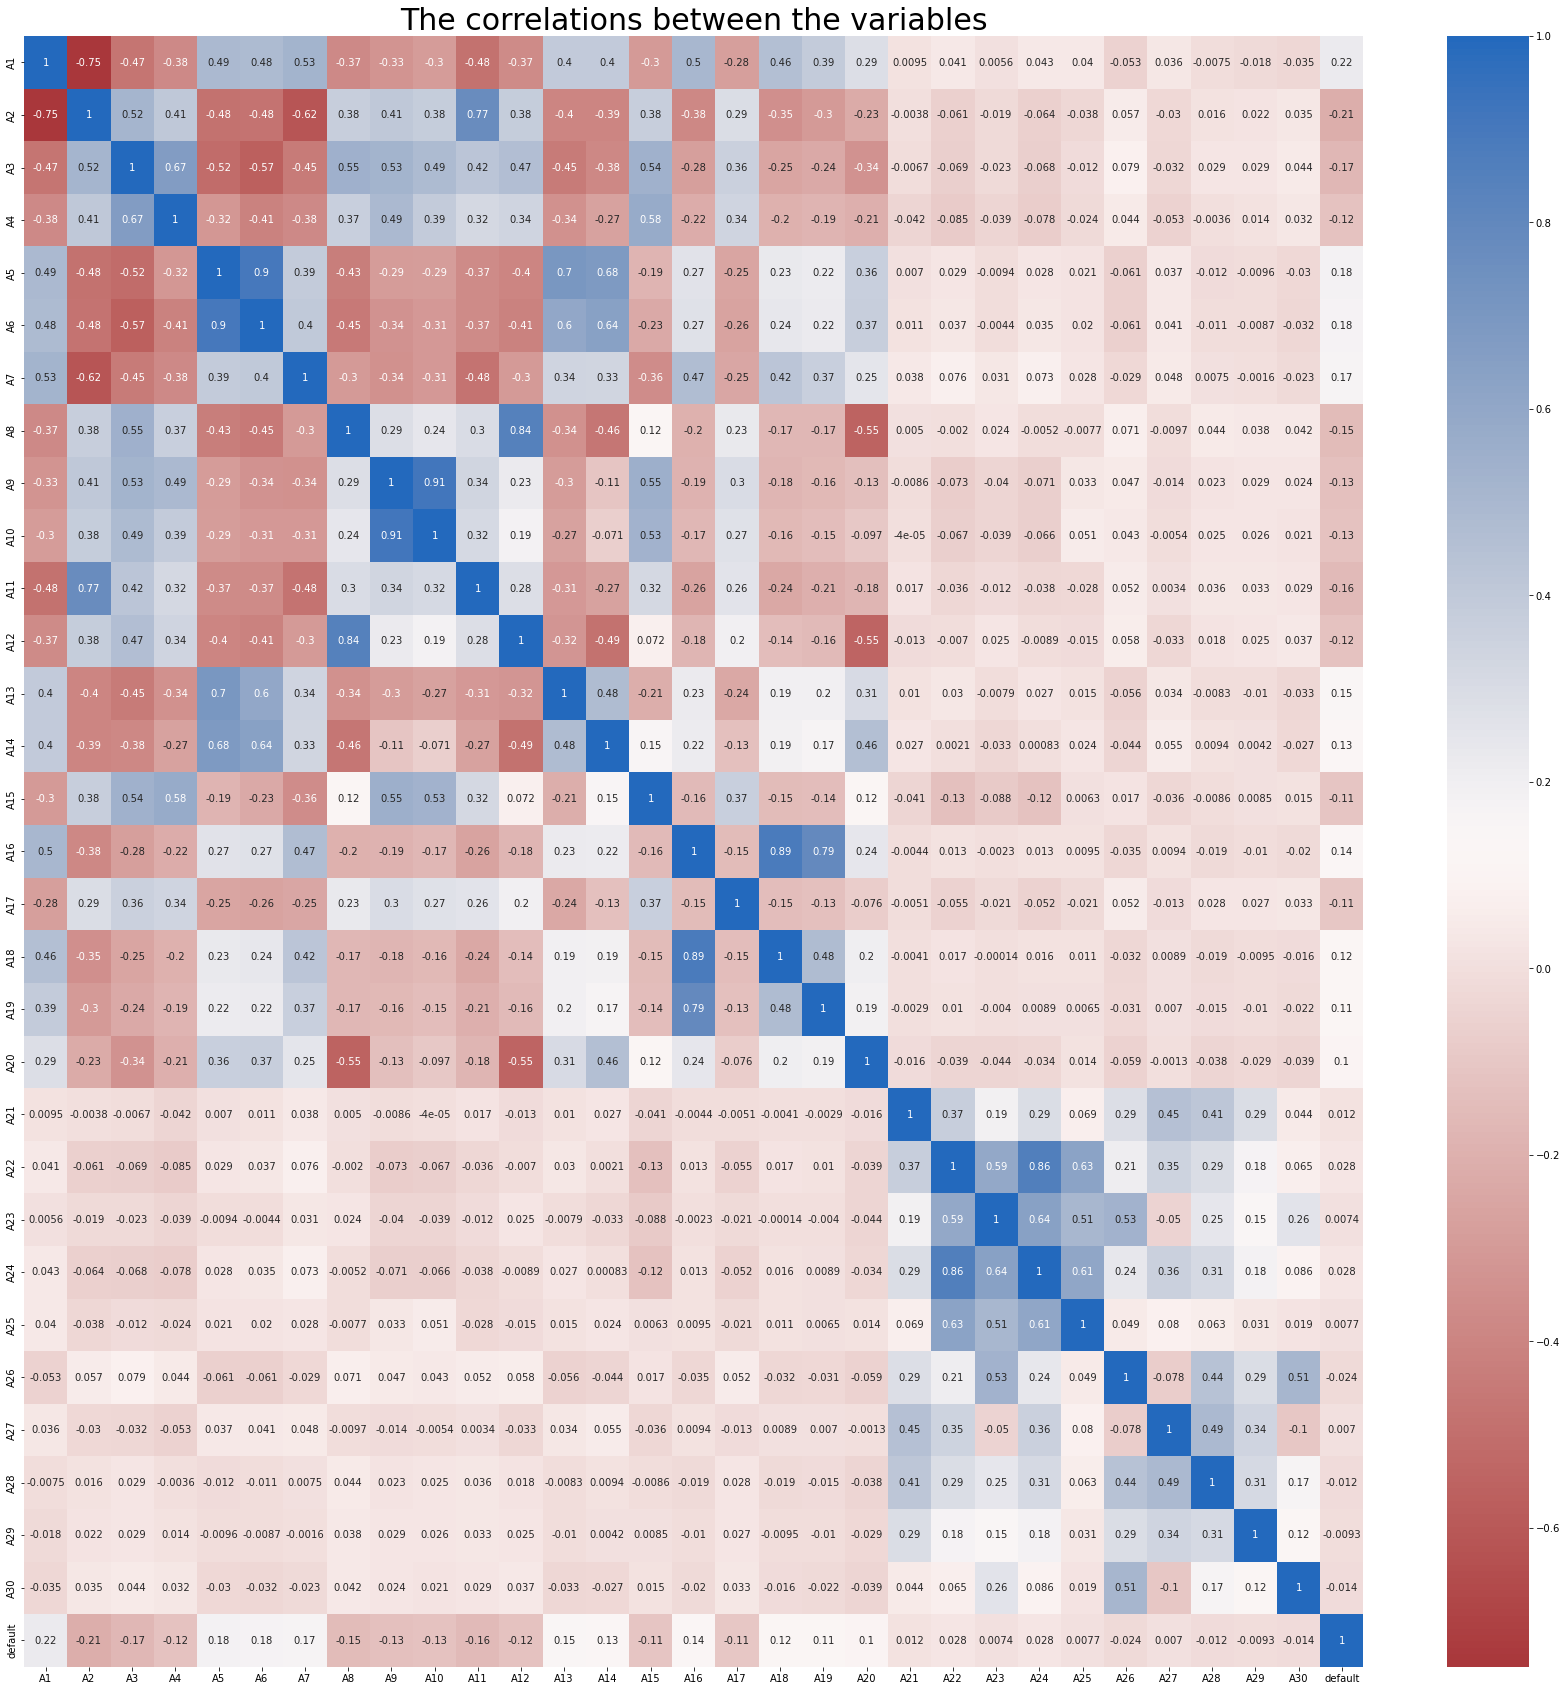

In [16]:
#plot correlation matrix
plt.figure(figsize=[30,30])
sns.heatmap(cor , cmap='vlag_r' ,annot=True )
plt.title('The correlations between the variables',size=30);

In [17]:
#Consider only columns A1 to A20. Drop the rest A13, A14, A15, A16, A17, A18, A19, A20 < 2%
features_new = features.drop(['A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20','A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30'], axis = 1)
features_new

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12
0,0.170467,0.824606,0.338738,0.116928,0.208356,0.217260,0.063203,0.277500,0.050818,0.040591,0.8429,0.353253
1,0.454473,0.560757,0.249264,0.039440,0.222603,0.160274,0.146760,0.173874,0.022727,0.022727,0.5980,0.197822
2,0.396587,0.669274,0.162738,0.037955,0.277397,0.352945,0.152116,0.179198,0.054545,0.031818,0.7717,0.258758
3,0.217509,0.821073,0.261551,0.054283,0.339452,0.366027,0.019282,0.327195,0.042614,0.049250,0.9588,0.409773
4,0.071759,0.948517,0.332143,0.117366,0.224315,0.259452,0.049277,0.292462,0.045455,0.034091,0.9455,0.306447
...,...,...,...,...,...,...,...,...,...,...,...,...
93995,0.130442,0.905994,0.163491,0.031826,0.209589,0.235822,0.039100,0.146317,0.000000,0.000000,1.0000,0.157786
93996,0.210812,0.799874,0.289163,0.084913,0.224247,0.238014,0.099089,0.223702,0.051977,0.042091,0.8349,0.274360
93997,0.237761,0.815268,0.175773,0.035643,0.214384,0.270068,0.111944,0.258969,0.068182,0.045455,0.9078,0.305564
93998,0.171743,0.822587,0.324318,0.114227,0.204932,0.210753,0.066417,0.281279,0.045750,0.031636,0.8418,0.339123


In [18]:
#split into test and train model.csv with all 30 feature columns
X_train, X_test, y_train, y_test = train_test_split(features_new, label, test_size = 0.30)

#### Logistic Regression using PCA

In [19]:
#feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = features_new.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = features_new.columns)

In [20]:
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12
0,-1.160655,1.447030,-0.313562,-0.209144,0.078038,0.335831,-1.201068,-0.862543,1.652829,1.827813,0.391224,-1.077192
1,-0.372383,0.813769,-0.599289,-0.495816,-0.570798,0.036533,-1.131732,-0.526430,-0.430746,-0.394930,1.215808,-1.120568
2,0.089341,0.091852,0.520684,-0.266222,-0.051058,-0.012532,0.136123,0.631090,0.084124,0.314488,0.148753,0.097562
3,1.217831,-1.993302,-0.848012,-0.683373,0.417546,0.483727,0.482803,-0.350371,-0.698326,-0.693395,-1.346789,-0.701271
4,-0.039760,0.082641,0.444037,-0.238149,-0.091296,0.071579,1.027584,0.572505,-0.883476,-0.609405,-0.709148,0.007196


In [21]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.48018436, 0.12582007, 0.10624355, 0.08168588, 0.05977813,
       0.04476582, 0.03961767, 0.0243035 , 0.01285273, 0.0109682 ,
       0.00738973, 0.00639037])

#### Logistic regression with only A1- A12 features which are closely collinear using PCA and Correlation using balanced class weights

In [22]:
model_lr = LogisticRegression(class_weight='balanced')
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)
#accuracy and confusion matrix for model.csv
print("The accuracy of the model is: ", accuracy_score(y_test, pred_lr))
print("The confusion matrix of the model is: \n", confusion_matrix(y_test, pred_lr))
print("F1 score: " ,f1_score(y_test, pred_lr))
#Low F1 score indicates matrix performs poory on minority cases

The accuracy of the model is:  0.7849645390070922
The confusion matrix of the model is: 
 [[22082  4880]
 [ 1184    54]]
F1 score:  0.017498379779650033


##### The F1 score is improved by ~20% by using balanced weights. 

#### Perform Correlation for feature of val.csv file

In [23]:
#Correlation between the features wrt default for val_df
cor_val = val_df.corr()
cor_val[['default']]

,default
A1,0.379729
A2,-0.348172
A3,-0.284188
A4,-0.205009
A5,0.307176
A6,0.299989
A7,0.263578
A8,-0.253846
A9,-0.218402
A10,-0.202581


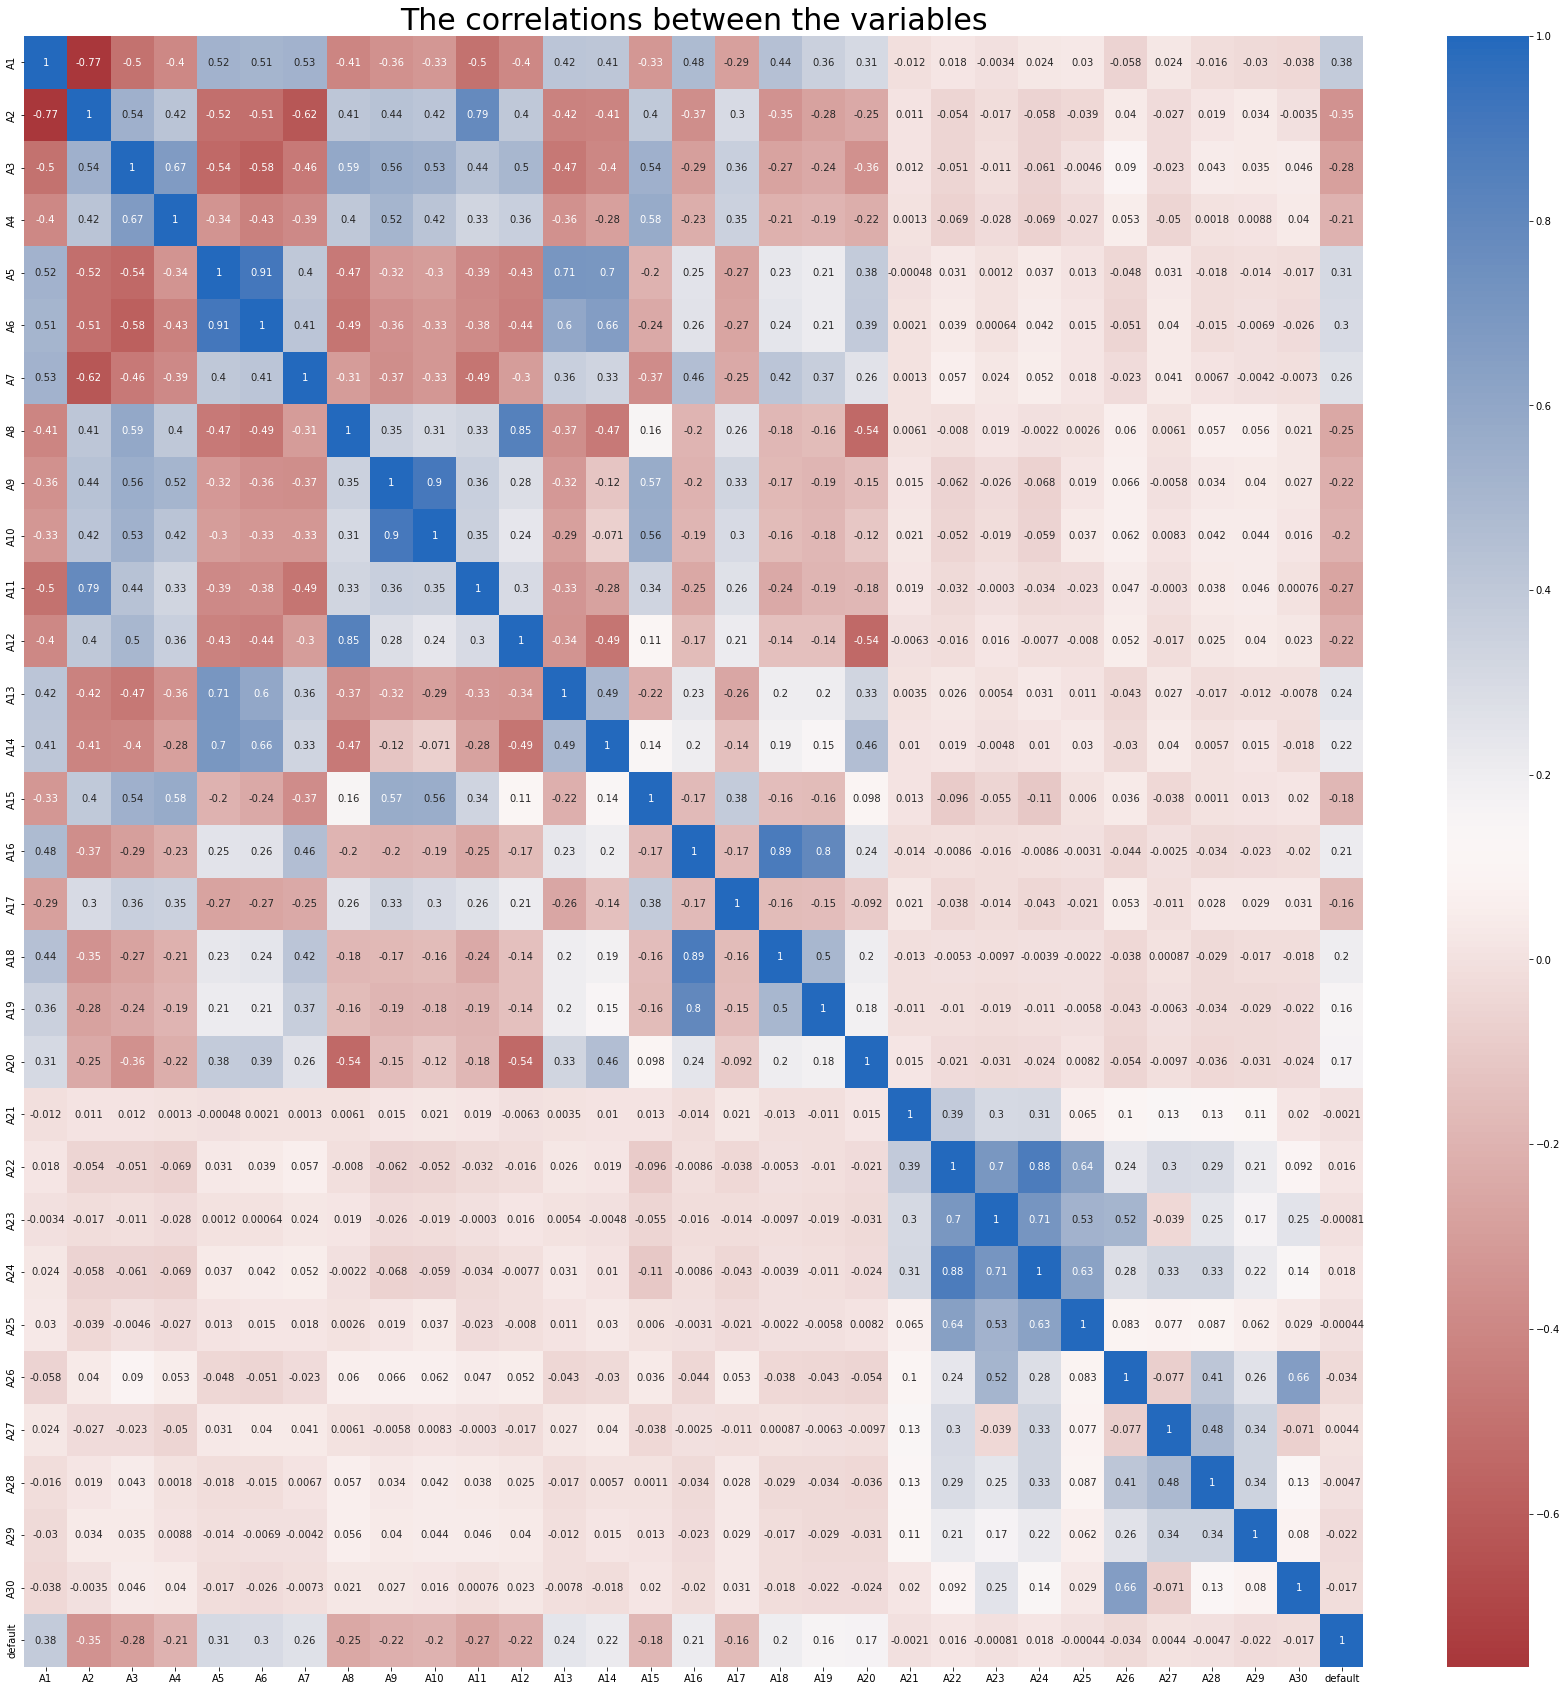

In [24]:
#plot correlation matrix
plt.figure(figsize=[30,30])
sns.heatmap(cor_val , cmap='vlag_r' ,annot=True )
plt.title('The correlations between the variables',size=30);

In [25]:
#Consider only columns A1 to A20. Drop the rest
features_val = features_val.drop(['A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
                                  'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30'], axis = 1)
features_val

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12
0,22.88,75.59,3367.08,6131.31,41.38,43.08,2.13,102.67,0.500,0.500,75.85,9.48
1,15.94,86.26,5595.00,10867.86,52.29,61.21,3.05,124.94,3.200,2.400,75.00,11.72
2,25.16,64.20,4758.44,7818.15,46.28,50.72,2.69,110.16,1.124,0.889,62.57,10.53
3,19.50,77.81,5762.27,6290.00,58.14,76.27,2.44,119.92,1.222,1.000,82.50,9.65
4,11.11,85.09,11400.50,20936.25,30.00,29.75,0.50,125.89,2.167,1.333,95.86,10.35
...,...,...,...,...,...,...,...,...,...,...,...,...
11495,14.55,88.05,8492.47,28646.00,46.15,49.21,0.40,90.21,1.615,1.231,91.12,8.47
11496,17.64,79.79,6303.06,8729.09,49.82,50.06,2.13,107.69,1.667,1.500,79.74,10.88
11497,28.31,74.50,5713.82,10946.15,38.15,33.27,3.29,102.87,1.250,1.000,62.57,9.73
11498,16.54,77.79,3028.71,4775.00,27.38,39.43,3.47,75.11,0.800,0.800,79.30,10.02


In [26]:
preds_valid = model_lr.predict(features_val)
score_valid = mean_absolute_error(label_val, preds_valid)
print("MAE: ", score_valid)
print(preds_valid)
# print(y_test)
confusion_matrix(label_val, preds_valid)

MAE:  0.8696521739130435
[1 1 1 ... 1 1 1]


array([[    0, 10000],
       [    1,  1499]])

In [27]:
results1 = pd.DataFrame(preds_valid)
print(results1)
#add results1 to results1.csv file
results1.to_csv('Results1.csv', index = "False")

       0
0      1
1      1
2      1
3      1
4      1
...   ..
11495  1
11496  1
11497  1
11498  1
11499  1

[11500 rows x 1 columns]


In [28]:
#Probabilities for belonging to the default class (labeled '1')
probabilities = model_lr.predict_proba(features_val)
probabilities

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [43]:
roc_auc_score(label_val, probabilities[:, 1])

0.4993832666666667

In [29]:
#accuracy and confusion matrix for model.csv
print("The accuracy of the model is: ", accuracy_score(y_test, pred_lr))
print("The confusion matrix of the model is: \n", confusion_matrix(y_test, pred_lr))

The accuracy of the model is:  0.7849645390070922
The confusion matrix of the model is: 
 [[22082  4880]
 [ 1184    54]]


#### Linear SVM

In [ ]:
#model for kernel 'linear'
linear_svc = svm.SVC(kernel = 'linear', class_weight= 'balanced', probability = True)
linear_svc.fit(X_train, y_train)
linear_svc.kernel

In [ ]:
#predicting on linear_svc
y_pred_linear = linear_svc.predict(X_test)
print("Linear SVM Accuracy = ", accuracy_score(y_test, y_pred_linear))
y_pred_linear

In [ ]:
preds_svm = linear_svc.predict(features_val)
results2 = pd.DataFrame(preds_svm)
results2
results2.to_csv('Results2.csv', index = "False")

In [ ]:
y_proba = linear_svc.predict_proba(X_test)

In [35]:
x_split_percent = []
m1 = []

for i in [0.15,0.20, 0.25, 0.30, 0.35]:
    X_train, X_test, y_train, y_test = train_test_split(features_new, label, test_size = i)
    linear_svc = svm.SVC(kernel = 'linear')
    linear_svc.fit(X_train, y_train)
    y_pred1 = linear_svc.predict(X_test)
    m1.append(accuracy_score(y_test, y_pred1))
    
    
    x_split_percent.append(i)
print("i:", x_split_percent)
print("Linear SVM: ", m1)

i: [0.15, 0.2, 0.25, 0.3, 0.35]
Linear SVM:  [0.957517730496454, 0.9557978723404256, 0.9573617021276596, 0.9580851063829787, 0.9560790273556231]


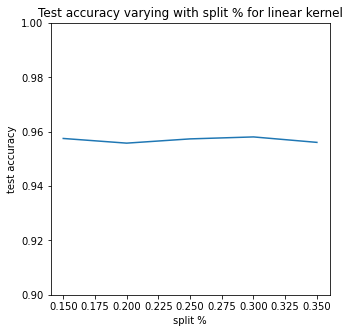

In [36]:
#plot figure for linear SVM
plt.figure(figsize=(5, 5))
plt.title('Test accuracy varying with split % for linear kernel')
plt.xlabel('split %')
plt.ylabel('test accuracy')
plt.plot(x_split_percent, m1)
plt.yticks([0.90, 0.92, 0.94, 0.96, 0.98, 1.00])
plt.show()

In [ ]:
roc_auc_score(label_val, probabilities[:, 1])